In [8]:
import numpy as np
import scipy.stats
import random
#from scipy import special
import matplotlib.pyplot as plt
#import SDDlib as sdd
#%matplotlib notebook
#import tqdm
#plt.rcParams['figure.figsize'] = [8, 8]


In [29]:
def salpgen(N): 
    stars = []
    while len(stars)<N:
        M = random.uniform(0.1,200)
        n = random.uniform(0, 0.1**-2.35)
        if n<=M**-2.35:
            stars.append(M)
    return stars


#this method works for SMALL GALAXIES as well
    
    


#def bbody(T):
#    return (2 * h * v**3 / c**2)/(np.exp(h*v/(kb*T))-1)

#M = []
#for i in range(1000):
 #   M.append(random. )


<function matplotlib.pyplot.show(close=None, block=None)>

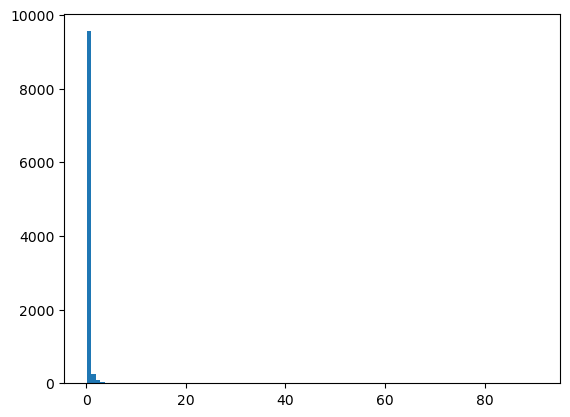

In [10]:
galaxy_stars=salpgen(10000)

plt.hist(galaxy_stars,100)
plt.show

Assumptions:
    only MS pp-chain stars
    Single stellar population: all stars born at same age. 
    Salpeter initial mass function

In [30]:
N = 10**10
L_sun = 1.989 * 10**33
T_sun = 5780
R_sun = 6.95*10**10

parsec = 3.086*10**18 #pc in cm




#n_m = M**-2.35
#N_m = N*n_m

#T_m = np.sqrt(M)*T_sun

#R_m = M**(3/7)*R_sun




#l_m = n_m**3 * L_sun
#L_m = N*l_m


G = 6.67*10**(-8) #g^-1 cm^3 s^-2
h = 6.63*10**(-27) #erg s 
c = 2.99*10**(10) #cm s^-1
m_p = 1.67262192 * 10**(-24) #g
kb = 1.38 * 10**(-16) #erg/K


x_A = np.linspace (3000, 10000, 7000) #lambda in armstrongs
x_cm = x_A*10**-8 #lambda in cm

#black body continuum for temperature T
def bbody_lambda(T):
    return (2*h*c**2 / (x_cm**5))/(np.exp(h*c/(x_cm*kb*T))-1)

#black body continuum emission (erg/s A) for a MS pp chain star of mass M
def bbody_lambda_mass(M):
    return bbody_lambda(np.sqrt(M)*T_sun) * 4* np.pi**2 *(M**(3/7)*R_sun)**2

#print(bbody_lambda_mass(1))

#spectrum of the galaxy is a convolution of single stars black body spectra. Every mass contribution must be weighted for Salpeter initial mass function
mass_array = np.arange(0.1,1,0.1)
galaxy_spectrum = x_A*0 
#for M in mass_array: 
    #galaxy_spectrum = galaxy_spectrum + N * M**-2.35 * bbody_lambda_mass(M)

#print(galaxy_spectrum/(4*np.pi*(10**7*parsec)**2))    
    

galaxy = salpgen(1000)
for M in galaxy: 
    galaxy_spectrum = galaxy_spectrum + bbody_lambda_mass(M)
    
    

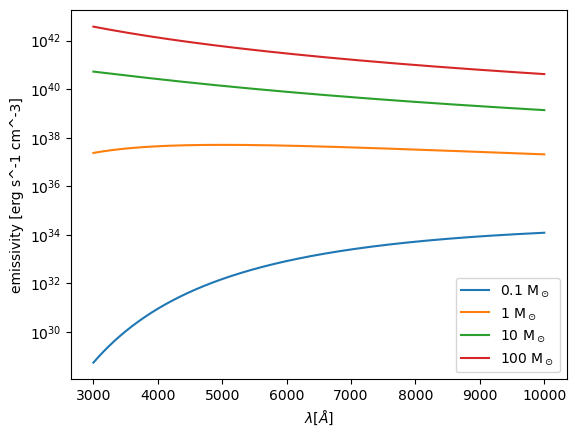

In [32]:
plt.plot(x_A,bbody_lambda_mass(0.1),label="0.1 M$_\odot$")
plt.plot(x_A,bbody_lambda_mass(1),label="1 M$_\odot$")
plt.plot(x_A,bbody_lambda_mass(10),label="10 M$_\odot$")
plt.plot(x_A,bbody_lambda_mass(100),label="100 M$_\odot$")

#plt.xscale("log")
plt.yscale("log")
plt.xlabel("$\lambda$[$\AA$]")
plt.ylabel("emissivity [erg s^-1 cm^-3]")
#plt.ylim(10**(-22), 10**(-19))
#plt.title("Thermal Bremsstrahlung Spectra")
plt.legend()
#plt.grid()
plt.show()


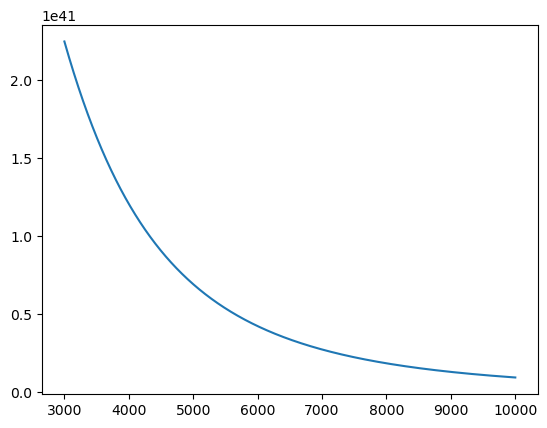

In [31]:
plt.plot(x_A,galaxy_spectrum)